<a href="https://colab.research.google.com/github/Jrhymer34/skills-introduction-to-github/blob/Projects/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
The goal of this assessment is to guide you through the modeling workflow to produce the best possible model. In this lesson, you will apply the best practices you've learned to date to slice your data and validate your model.

You'll demonstrate the following skills:

**Linear Regression**
* Handling categorical features in a scikit-learn model.
* Carrying out a train/test split.
* Training a model.
* Evaluating that model on the testing data.

**K-Nearest Neighbors**
* Preparing your data for modeling.
* Scaling your data.
* Tuning a hyperparameter using k-fold cross-validation.
* Selecting a model based on a tuning parameter.
* Using a model to make predictions on new data.

**Compare to other models**
* Pick a model to compare against.

In [ ]:
# Import everything you need for this project here.
# You will want to return to this cell to import more things later in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score



### Part 1: Regression on MPG Data

#### Read the Data
The [`mpg` data set](https://archive.ics.uci.edu/ml/datasets/auto+mpg) represents the fuel economy (in miles per gallon) for 38 popular models of car, measured between 1999 and 2008.

|Factor      |Type                              |Description                                               |
|------------|----------------------------------|----------------------------------------------------------|
|manufacturer|multi-valued discrete             |Vehicle manufacturer                                      |
|model       |multi-valued discrete             |Model of the vehicle                                      |
|displ       |continuous                        |Size of engine [litres]                                   |
|year        |multi-valued discrete             |Year of vehicle manufacture                               |
|cyl         |multi-valued discrete             |Number of ignition cylinders                              |
|trans       |multi-valued discrete             |Transmission type (manual or automatic)                   |
|drv         |multi-valued discrete             |Driven wheels (f=front, 4=4-wheel, r=rear wheel drive)    |
|city        |continuous                        |Miles per gallon, city driving conditions (fuel economy)  |
|hwy        |continuous                        |Miles per gallon, highway driving conditions (fuel economy)  |
|fl          |multi-valued discrete             |Vehicle type                                              |
|class       |multi-valued discrete             |Vehicle class (suv, compact, etc)                         |

In [ ]:
# Read the mpg data into a dataframe.

# Read the mpg data into a dataframe.
from google.colab import files
import io


uploaded = files.upload()

mpg=pd.read_csv(io.BytesIO(uploaded['mpg.csv']), encoding = 'latin-1')

Saving mpg.csv to mpg.csv


## Explore the Data
Use this space to familiarize yourself with the data set.

Convince yourself that there are no issues with the data. If you find any, clean them now.

In [ ]:
#NO NULLS
print(f'The number of nulls is {mpg.isnull().sum().sum()}')
mpg.columns=[col.lower().replace(' ','_') for col in mpg.columns]
target='hwy'
features=[]
for col in mpg:
    if col not in ['cty', 'hwy']:
        features.append(col)

mpg.year.describe()
num_features=['displ','year','cyl'] #I might move year and cyl to cat
cat_features=[col for col in features if col not in num_features]
for col in cat_features:
    print(col, mpg[col].nunique(),'\n')
    print(col, mpg[col].unique())

The number of nulls is 0
manufacturer 15 

manufacturer ['audi' 'chevrolet' 'dodge' 'ford' 'honda' 'hyundai' 'jeep' 'land rover'
 'lincoln' 'mercury' 'nissan' 'pontiac' 'subaru' 'toyota' 'volkswagen']
model 38 

model ['a4' 'a4 quattro' 'a6 quattro' 'c1500 suburban 2wd' 'corvette'
 'k1500 tahoe 4wd' 'malibu' 'caravan 2wd' 'dakota pickup 4wd'
 'durango 4wd' 'ram 1500 pickup 4wd' 'expedition 2wd' 'explorer 4wd'
 'f150 pickup 4wd' 'mustang' 'civic' 'sonata' 'tiburon'
 'grand cherokee 4wd' 'range rover' 'navigator 2wd' 'mountaineer 4wd'
 'altima' 'maxima' 'pathfinder 4wd' 'grand prix' 'forester awd'
 'impreza awd' '4runner 4wd' 'camry' 'camry solara' 'corolla'
 'land cruiser wagon 4wd' 'toyota tacoma 4wd' 'gti' 'jetta' 'new beetle'
 'passat']
trans 10 

trans ['auto(l5)' 'manual(m5)' 'manual(m6)' 'auto(av)' 'auto(s6)' 'auto(l4)'
 'auto(l3)' 'auto(l6)' 'auto(s5)' 'auto(s4)']
drv 3 

drv ['f' '4' 'r']
fl 5 

fl ['p' 'r' 'e' 'd' 'c']
class 7 

class ['compact' 'midsize' 'suv' '2seater' 'miniv

In [ ]:
# Verify the data was read in correctly.
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


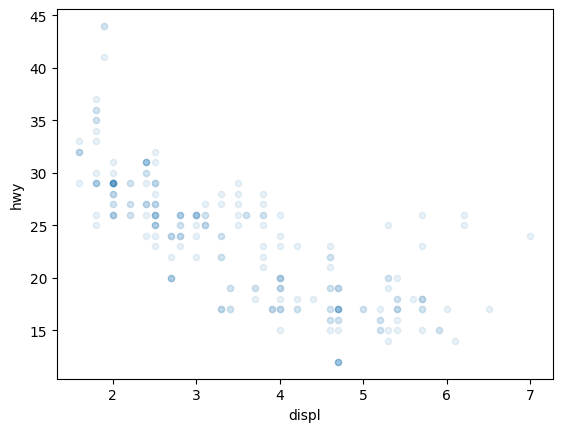

In [ ]:
mpg.plot(kind='scatter',x='displ',y='hwy', alpha=0.1);

In [ ]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

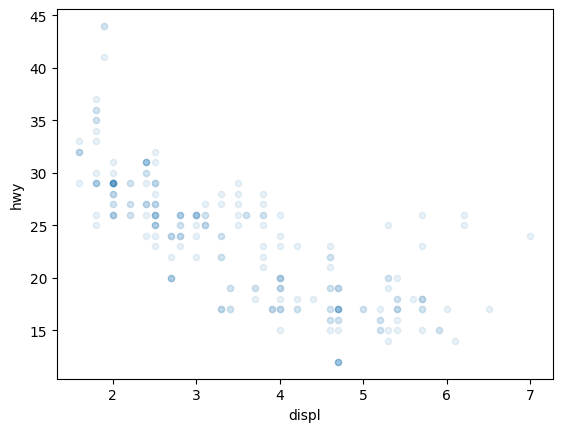

In [ ]:
mpg.plot(kind='scatter',x='displ',y='hwy', alpha=0.1);

### Assign Features `X` and Target `y`
You only need to keep the `displ` and dummy `drv` variable(s) here, as those are the only columns you'll be fitting your model on in the next section. The target is `hwy`.

### Instantiate a Linear Regression Model Object Predicting Highway MPG
Instantiate a `LinearRegression` object here.

In [ ]:
# Create feature matrix (X).
feature_cols = ['displ','drv_r']

X = mpg[num_features]
X


,displ,year,cyl
0,1.8,1999,4
1,1.8,1999,4
2,2.0,2008,4
3,2.0,2008,4
4,2.8,1999,6
...,...,...,...
229,2.0,2008,4
230,2.0,2008,4
231,2.8,1999,6
232,2.8,1999,6


In [ ]:
drv_dummies=pd.get_dummies(mpg['drv'],dtype=int,drop_first=True)

In [ ]:
#new_mpg_dummies=pd.concat([new_mpg,drv_r_dummies], axis=1)
mpg_dummies=pd.concat([mpg,drv_dummies],axis=1)

In [ ]:
y=mpg.hwy

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train

,displ,year,cyl
150,3.3,1999,6
92,4.0,2008,6
53,4.7,2008,8
116,2.0,1999,4
47,4.0,2008,6
...,...,...,...
156,3.8,1999,6
223,2.0,1999,4
15,2.8,1999,6
218,2.5,2008,5


In [ ]:
X_test

,displ,year,cyl
77,4.0,1999,6
200,2.7,1999,4
160,2.5,1999,4
197,1.8,2008,4
214,2.0,1999,4
13,3.1,2008,6
104,1.8,2008,4
204,3.4,1999,6
174,2.7,1999,4
158,5.3,2008,8


#Prediction Model

In [ ]:
#y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)

In [ ]:
y_train

,hwy
150,17
92,26
53,19
116,29
47,23
...,...
156,27
223,29
15,24
218,29


In [ ]:
y_lr_train_pred

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(max_iter=1000)
# Create feature matrix (X).

#Create y metrix
X = mpg[num_features]
y =mpg.hwy # Create response vector (y).
# Split train-test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=20)
#INstatntiate the model
rf=RandomForestClassifier(random_state=100)
#fit the model
rf.fit(X_train,y_train)
#make predictions
predictions=rf.predict(X_test)
#evaluate gthe model
print('RF',metrics.accuracy_score(y_test,predictions))

RF 0.425531914893617


## Evaluate Your Model

- Run five-fold cross-validation on your data.
  - Report the mean of the `mean_squared_error` across five folds (include the units the error is expressed in).
  - Report the mean R-squared value across five folds.

In [ ]:
# mean error
RSME=mean_squared_error(y_test,y_lr_test_pred)**(1/2)
#lr_train_error=mean_squared_error(y_train,y_lr_train_pred)
#lr_train_r2_score= r2_score(y_train,y_lr_train_pred)
# mean R^2

r2= r2_score(y_test,y_lr_test_pred)

In [ ]:
print('RSME:Mean Squared Error(Train):', RSME)
#print('R2 Score(Train):', lr_train_r2_score)
#print('RSME:Mean Squared Error(Test):', lr_test_error)
print('R2 Score(Test):', r2)


RSME:Mean Squared Error(Train): 3.8890791896838794
R2 Score(Test): 0.6089080450838864


In [ ]:
X = mpg[num_features]
y =mpg.hwy # Create response vector (y).
# Split train-test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=20)
#INstatntiate the model
rf=RandomForestClassifier(random_state=100)
#fit the model
rf.fit(X_train,y_train)
#make predictions
predictions=rf.predict(X_test)
#evaluate gthe model
print('RF',metrics.accuracy_score(y_test,predictions))
RSME=mean_squared_error(y_test,y_lr_test_pred)**(1/2)
r2= r2_score(y_test,y_lr_test_pred)
print(RSME,r2)

RF 0.425531914893617
3.8890791896838794 0.6089080450838864


In [ ]:
def rmse_r2_function(feature_cols):
    num_col=[col for col in feature_cols if col in num_features]
    cat_col=[col for col in feature_cols if col in cat_features]
    if cat_col:
        dummies=pd.get_dummies(mpg[cat_col],dtype=int, prefix='drv',drop_first=True)

        X=pd.concat([mpg[num_col],dummies],axis=1)
    else:
        X=mpg[num_col]

    y=mpg.hwy
    lr=RandomForestRegressor()
    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=102)
    lr.fit(X_train,y_train)
    preds=lr.predict(X_test)
    RMSE=(mean_squared_error(y_test,preds))**(1/2)
    r2=r2_score(y_test,preds)
    return RMSE, r2

In [ ]:
rmse_r2_function(['displ','drv_r','fl'])

(2.5674410075484553, 0.7904675980994667)

<Axes: xlabel='fl', ylabel='hwy'>

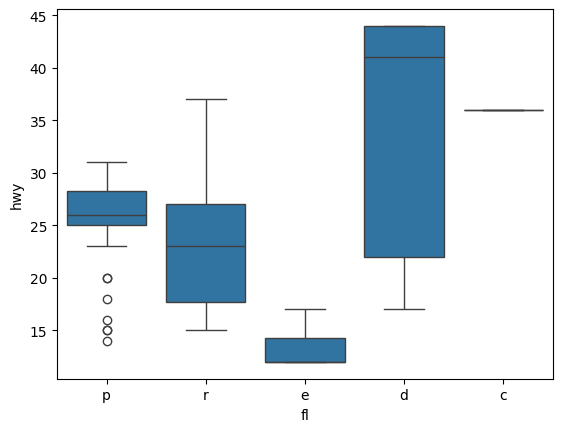

In [ ]:
sns.boxplot(x='fl', y='hwy', data=mpg)

## Part 2: Classification Using Logistic Regression, KNN & Others

This part of the project is an update to the Wisconsin Breast Cancer data set.

It will cover the following skills:

1. **Loading Data**
2. **Exploratory Data Analysis - numerical & visual & Data cleaning**
3. **Pre-processing & setting up a data lab via train-test split.**
4. Modeling creation
5. Hyperparameter Tuning & Cross-validation
6. Best Model Selection
7. Model Performance Analysis using appropriate metrics.
8. Comparison of two different methods and why use one over the other.
9. **Statistical Analysis using bootstrapping

### Load and Explore the Data
#### Load and verify the `breast-cancer` data
Load the data and verify it was loaded correctly. The data is located in this repo under the `data` directory. Note that the data comes in two parts the actual data and a separate file with column names. File names are listed below.

* Data - ```breast-cancer.csv```
* Field Names - ```field_names.txt```

You'll have to read in the Field Names and assign them as columns for the data frame.

Use `f = open('name_path', 'r+')` to open the name file and `.readlines()` to grab the values.

Here's a description of the data.

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” - 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in a total of 30 features. So, for example, in addition to ```radius``` there is ```mean radius```, and ```radius std error```.

In [ ]:
# load the data into a pandas dataframe and verify.
data_path = 'breast-cancer.csv'
name_path = 'field_names.txt'
import pandas as pd

In [ ]:
# Load csv into dataframe (w/o header)
from google.colab import files
import io
import pandas as pd


# Upload the data and field names files only once
uploaded = files.upload()

# Access the uploaded files using the correct keys
data = pd.read_csv(io.BytesIO(uploaded['breast-cancer.csv']), header=None)
uploaded_names = files.upload()
f = uploaded_names['field_names.txt'].decode('utf-8')
# Grab headers from file and read into a list


Saving breast-cancer.csv to breast-cancer (16).csv


Saving field_names.txt to field_names (5).txt


In [ ]:
data.sample(5)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
358,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,...,9.981,17.70,65.27,302.0,0.1015,0.1248,0.09441,0.04762,0.2434,0.07431
56,857637,M,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,...,26.140,28.14,170.10,2145.0,0.1624,0.3511,0.38790,0.20910,0.3537,0.08294
15,84799002,M,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,...,17.460,37.13,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410
534,919537,B,10.960,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,...,11.620,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278
222,8812844,B,10.180,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,...,11.170,22.84,71.94,375.6,0.1406,0.1440,0.06572,0.05575,0.3055,0.08797


In [ ]:
column_names = []
for line in f.split('\n'):
    if line.strip():  # Check if the line is not empty after removing leading/trailing spaces
        column_names.append(line.strip())


# Add headers to dataframe and verify
data.columns = column_names
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Verify the data. Use transpose the result to make it easier to read.
data.sample(5)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
281,8912055,B,11.740,14.02,74.24,427.3,0.07813,0.04340,0.02245,0.02763,...,13.31,18.26,84.70,533.7,0.1036,0.0850,0.06735,0.08290,0.3101,0.06688
478,911685,B,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,...,12.40,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
426,907409,B,10.480,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,...,12.13,21.57,81.41,440.4,0.1327,0.2996,0.29390,0.09310,0.3020,0.09646
265,88995002,M,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,...,32.49,47.16,214.00,3432.0,0.1401,0.2644,0.34420,0.16590,0.2868,0.08218
103,862980,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,...,10.76,26.83,72.22,361.2,0.1559,0.2302,0.26440,0.09749,0.2622,0.08490


In [ ]:
data_transposed=data.T
data_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
ID,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
radius_sd_error,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
radius_worst,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143.0,142.0,131.2,108.3,140.1,47.92


In [ ]:
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
data.diagnosis.value_counts(normalize=True)

,proportion
diagnosis,
B,0.627417
M,0.372583


In [ ]:
data['diagnosis'] = data.diagnosis.map({'B':0,'M':1})

In [ ]:
#for diagnosis in data.diagnosis:
  #if diagnosis=='B':
    #diagnosis= 0
  #else:
     #diagnosis=1
#data.diagnosis.value_counts(normalize=True)


,proportion
diagnosis,
1,1.0


### EDA

Throughout - provide brief comments indicating any interim findings, etc. (Be sure to use the features of Jupyter Notebooks appropriately.)

Apply the techniques of data exploration to quickly determine:
1. What does the data consists of: Identify the features and target, data types, etc.
2. how much data you have, is it balanced?
3. Generate summary statistics and create pertinent visualizations. **You MUST show at least one pertinent visualzation**.
4. Identify if there are any problems with the data and if any data cleaning steps are needed.
5. Look for relationships and interactions among features as appropriate.he Data

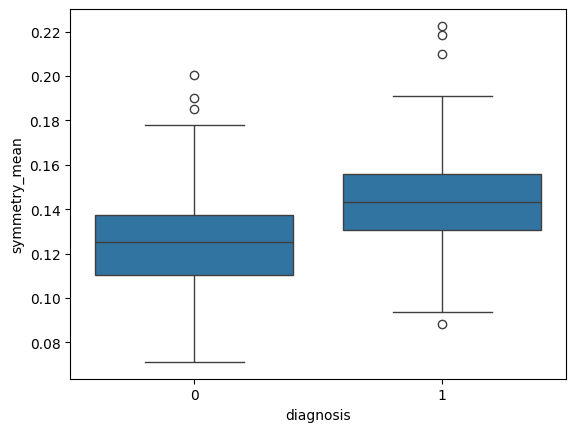

In [ ]:
sns.boxplot(x='diagnosis',y='symmetry_mean',data=data);

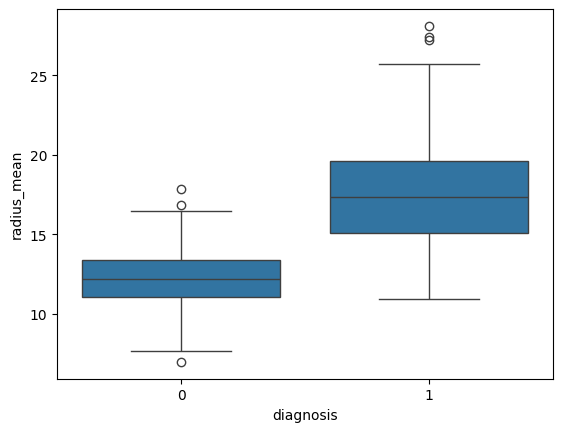

In [ ]:
# Answers - create as many new cells as you need.
import seaborn as sns
sns.boxplot(x='diagnosis',y='radius_mean',data=data);

### Prepare Your `X`, `y` Matrices
Construct an `X` and `y` matrices from the data. Be sure to identify the appropriate target.

In [ ]:
feature_cols = ['radius_mean','symmetry_mean','concavity_worst']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib.pyplot as plt


diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64
Accurtacy KNeighbors:  0.8671328671328671
Recall: 0.8113207547169812
[[81  9]
 [10 43]]


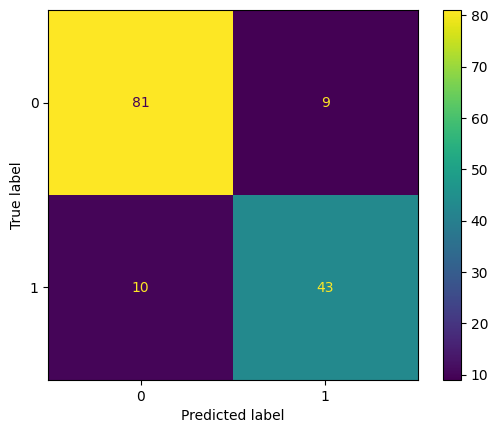

In [ ]:
# Answer
X=data[['radius_mean']]
y=data.diagnosis
print(y.value_counts(normalize=True))
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10, stratify=y)
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
kn=KNeighborsClassifier()
kn.fit(X_train_sc,y_train)
pred_kn=kn.predict(X_test_sc)
print('Accurtacy KNeighbors: ', accuracy_score(y_test,pred_kn))
print("Recall:", recall_score(y_test,pred_kn))
#"""Recall is the percentage of the relevant class (1) that
#are predicted correctly""
cm=confusion_matrix(y_test,pred_kn)
print(cm)
disp= ConfusionMatrixDisplay(cm)
disp.plot();

In [ ]:
43/(43+10)

0.8113207547169812

### Preprocessing and set up our modeling environment

In this section you'll work on building and evaluating a model for the breast cancer data. Use visualizations where needed.

- Pre-processing (scale the data) & setting up a data lab via train-test split.
- Modeling creation & tuning w/ cross-validation using 5 folds.
- Best Model Selection & training
    - Find the best $k$
    - Train with the best $k$
    - Create a baseline model
- Evaluate model performance using appropriate metrics.
    - Make predictions with the best model.
    - Evaluate the results, including comparing to the baseline.
- Build 1 more model and compare them.
- **Optional** Perform statistical analysis using bootstrapping.


In [ ]:
def kn_breast_dataset(features,k=5):
  X=data[features]
  y=data.diagnosis

  X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10, stratify=y)

  sc=StandardScaler()
  X_train_sc=sc.fit_transform(X_train)
  X_test_sc=sc.transform(X_test)
  kn=KNeighborsClassifier()
  kn.fit(X_train_sc,y_train)
  pred_kn=kn.predict(X_test_sc)

  return accuracy_score(y_test,pred_kn), recall_score(y_test,pred_kn)

#"""Recall is the percentage of the relevant class (1) that
#are predicted correctly""
features=['radius_mean']
kn_breast_dataset(features)

(0.8671328671328671, 0.8113207547169812)

In [ ]:
features=['radius_mean']
recalls=[]
accuracies=[]
for k in range(1,50):
    accuracy, recall = kn_breast_dataset(features, k)
    #print(accuracy,recall,k)
    accuracies.append((k,accuracy))
    recalls.append((k,recall))

In [ ]:
sorted(accuracies,reverse=True, key=lambda x: x[1])
sorted(recalls,reverse=True, key=lambda x: x[1])
kn_breast_dataset(features,3) #gaining recall in exchage for accuracy

(0.8671328671328671, 0.8113207547169812)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score


X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=22)
ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)
knn=KNeighborsClassifier()
lr=LogisticRegression()
rf=RandomForestClassifier()
knn.fit(X_train_sc,y_train)
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
pred_kn=knn.predict(X_test_sc)
pred_lr=lr.predict(X_test)
pred_rf=rf.predict(X_test)
print('Accurtacy KNeighbors: ', accuracy_score(y_test,pred_kn))
print('Accurtacy LogisticRegression: ', accuracy_score(y_test,pred_lr))
print('Accurtacy RandomForest: ', accuracy_score(y_test,pred_rf))
cm=confusion_matrix(y_test,pred_kn)
print(cm)

### Part 3: Try at least one other method.

Choose one of the following methods and build a model to compare to your earlier results.

1. Logistic Regression
2. Decision Tree
3. Random Forest

Repeat your analysis using one of the above methods and evaluate your results. For a conclusion you'll select which model you would put into production and explain why.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=100)
#fit the model
dt.fit(X_train,y_train)
#make predictions
predictions=dt.predict(X_test)
#evaluate gthe model
print('DT',metrics.accuracy_score(y_test,predictions))


DT 0.9230769230769231


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#y_test=y_test.map({'B':0,'M':1})


In [ ]:
print('Recall KNeighbors: ', recall_score(y_test,pred_kn))
print('Recall LogisticRegression: ', recall_score(y_test,pred_lr))
print('Recall RandomForest: ', recall_score(y_test,pred_rf))

Recall KNeighbors:  0.8113207547169812
Recall LogisticRegression:  0.24528301886792453
Recall RandomForest:  0.3584905660377358


In [ ]:
confusion_matrix(y_test,pred_kn,labels=[0,1]),confusion_matrix(y_test,pred_rf,labels=[0,1])

(array([[81,  9],
        [10, 43]]),
 array([[54, 36],
        [34, 19]]))

### Optional: Statistical Significance and Bootstrapped Data

Here you'll compute the mean and median for the ```smoothness_mean``` grouped by diagnosis (benign vs malignant). You should end up with a mean smoothness for benign tumors and mean smoothness for malignant tumors.

Is there a difference in these values? If so, is that difference statistically significant?

Do the following:
1. Create a visualization to compare ```smoothness_mean``` by diagnosis.
2. Determine if the results are statistically significant.
    1. Define a null and alternative hypothesis. Briefly state them.
    2. Write a function to generate bootstrap samples.
    3. Draw samples from the bootstrapped data and compute the statistics for those samples. Be sure to draw samples of the same size as the original data.
    4. Compute a p-value
3. What conclusion can you reach. Write a brief statement.

_Hint_: You can use Python's ```resample``` method or pandas ```.sample()``` method.

